# Semana 3 do Aceleradev DS Codenation

## Professor: Túlio Vieira de Souza | Tema: Análise Exploratória de Dados (EDA)

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
df1 = pd.read_csv("~/projetos_python/aceleradev/Data-Science-Online/Semana 3/houses_to_rent_v2.csv")

In [3]:
df1.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [4]:
df1.rename(columns={"rent amount (R$)": "valor_aluguel"}, inplace= True)

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  object
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   valor_aluguel        10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


Analisando os tipos de dados, podemos "enxugar" um pouco esse *df* mudando os tipos primitivos.

**Coluna "floor"**

In [6]:
df1['floor'].value_counts()

-      2461
1      1081
2       985
3       931
4       748
5       600
6       539
7       497
8       490
9       369
10      357
11      303
12      257
13      200
14      170
15      147
16      109
17       96
18       75
19       53
20       44
21       42
23       25
25       25
22       24
26       20
24       19
27        8
28        6
29        5
32        2
301       1
35        1
51        1
46        1
Name: floor, dtype: int64

Agora sabemos porque essa coluna é classificada como *object* sendo que seus valores são majoritariamente *int*, tem registros preenchidos com "-" para simbilizar **ausência de andares**. E para resolver isso, basta substituir o seu valor por um 0

In [7]:
df1['floor'].replace('-', 0, inplace=True)

In [8]:
df1['floor'].value_counts()

0      2461
1      1081
2       985
3       931
4       748
5       600
6       539
7       497
8       490
9       369
10      357
11      303
12      257
13      200
14      170
15      147
16      109
17       96
18       75
19       53
20       44
21       42
23       25
25       25
22       24
26       20
24       19
27        8
28        6
29        5
32        2
51        1
301       1
35        1
46        1
Name: floor, dtype: int64

Agora, podemos tornar essa coluna um tipo numérico, e também mudar a quantidade de memória gastas em outras, pois tem colunas em *int64* que não precisam de toda esse armazenamento

In [9]:
df_lite = df1.astype({'area': 'uint16', 'rooms': 'uint16', 'bathroom': 'uint16', 'parking spaces': 'uint16', 'floor': 'uint16', 'hoa (R$)': 'uint16', 'valor_aluguel': 'uint16', 'property tax (R$)': 'uint16', 'fire insurance (R$)': 'uint16', 'total (R$)': 'uint16'}, copy=True)
df_lite.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  uint16
 2   rooms                10692 non-null  uint16
 3   bathroom             10692 non-null  uint16
 4   parking spaces       10692 non-null  uint16
 5   floor                10692 non-null  uint16
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  uint16
 9   valor_aluguel        10692 non-null  uint16
 10  property tax (R$)    10692 non-null  uint16
 11  fire insurance (R$)  10692 non-null  uint16
 12  total (R$)           10692 non-null  uint16
dtypes: object(3), uint16(10)
memory usage: 459.5+ KB


Como podemos perceber, nesse *dataframe* nao existem valores nulos, basta comparar **RangeIndex** com **Non-Null Count**. Eles são iguais. Mas se quiser, basta conferir com o método .isna()

In [10]:
df_lite.isna().sum()

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
valor_aluguel          0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

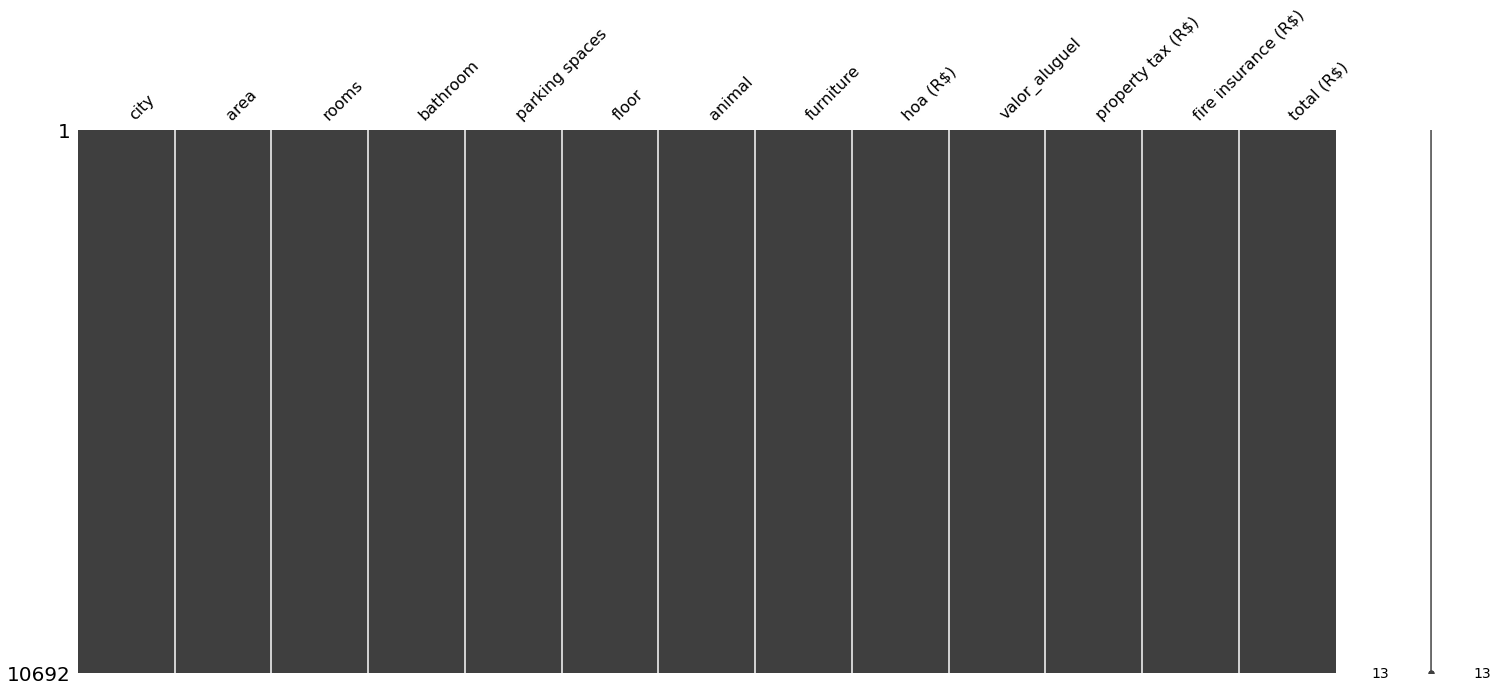

In [40]:
msno.matrix(df_lite);

**Primeira Coisa:** Definir o que vamos trabalhar. No caso desse *df*, analisaremos o valor do aluguel

**Segunda Coisa:** fazer uma análise **UNIVARIÁVEL** no que estamos analisando

In [11]:
df1["valor_aluguel"].mean()

3896.247194163861

In [12]:
df1['valor_aluguel'].median()

2661.0

In [13]:
df1['valor_aluguel'].std()

3408.5455176710675

In [14]:
df1['valor_aluguel'].mode()

0    2500
dtype: int64

Para resumir

In [15]:
df_lite['valor_aluguel'].describe()

count    10692.000000
mean      3896.247194
std       3408.545518
min        450.000000
25%       1530.000000
50%       2661.000000
75%       5000.000000
max      45000.000000
Name: valor_aluguel, dtype: float64

**Repare:** Olhando os quartis, de 75% ao *max*, o valor do aluguel cresceu 9 vezes, enquanto que do min aos 25%, cresceu apenas 3.4 vezes. Diante disso, podem ser que existam *outliers*

In [16]:
df_lite['valor_aluguel'].value_counts(bins=9)

(405.449, 5400.0]     8252
(5400.0, 10350.0]     1728
(10350.0, 15300.0]     699
(15300.0, 20250.0]       9
(20250.0, 25200.0]       2
(40050.0, 45000.0]       1
(25200.0, 30150.0]       1
(35100.0, 40050.0]       0
(30150.0, 35100.0]       0
Name: valor_aluguel, dtype: int64

Agora, sabemos onde estes valores estão concentrados, basta olhar os intervalos de classes e suas frequências absolutas. Mas para ver essa informação **graficamente**

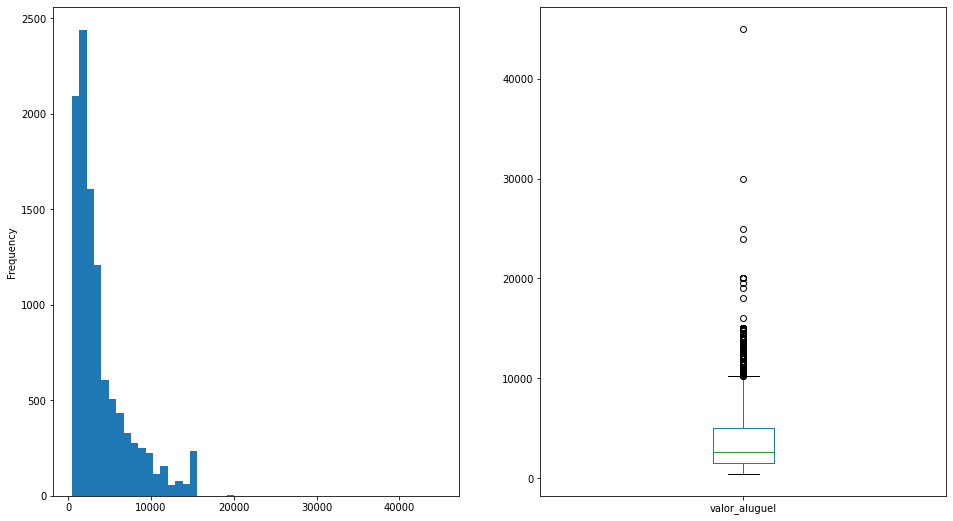

In [17]:
figure, (g1, g2) = plt.subplots(1, 2, figsize=(16,9))
df_lite['valor_aluguel'].plot(kind='hist', bins=50, ax=g1);
df_lite['valor_aluguel'].plot(kind='box', ax=g2);

**Pensamento Interessante:** Como um Cientista de Dados tende a ter problemas muito diversos, é quase impossível que ele tenha conhecimento de tudo. Dessa base de dados por exemplo, que fala de valores de aluguéis, qual a chance deu ter conhecimento profundo nisso? se vc nao é do ramo imobiliário, ou nunca alugou uma casa, é pouco provável que saiba. Ou seja: **PERGUNTE**. Faça isso, pois sempre que abrimos uma base de dados, buscamos por duas coisas: **Perguntas** e **Hipóteses**. Portanto, a base de conhecimento para gerar os dois citados virá de **pesquisa**. Porque pode acontecer de se gastar tempo com uma análise sob um ponto de vista equivocado, o que fará com que inutilize o seu valor.

### Hipóteses

1. São Paulo é a cidade com aluguel mais caro.
2. Quanto mais banheiros, maio o valor do imóvel.
3. Imóveis mobiliados tem aluguel mais caro.

Produzir hipóteses é uma tarefa que parece fácil, pois muitas vezes beira o senso comum. Quando se entra no mundo do negócio, para se aprofundar mais no problema, quem tomamos como fonte de conhecimento pode reproduzir coisas  que, para elas já são óbvias. Só que nós não sabemos se tais "certezas" passaram por alguma validação científica. Diante disso, **testarmos** hipóteses é muito importante.

### Perguntas

1. Qual a cidade com aluguel mais alto?
2. As casas de aluguel mais caro possuem quantos banheiros?
3. Os imóveis mais caros aceitam animais?
4. Os imóveis mais caros são mobiliados?

Não precisamos nos basearmos **apenas** nos valores desse *dataset*, podemos procurar por população dessas cidades, renda per capta, idh, densidade demográfica, e assim vai

In [18]:
#  1
df_lite.groupby('city').agg({'valor_aluguel': ['mean', 'median']}).sort_values(by=('valor_aluguel','mean'), ascending=False)

valor_aluguel       
                        mean median
city                               
São Paulo        4652.793783   3400
Belo Horizonte   3664.127981   2300
Rio de Janeiro   3232.904064   2300
Campinas         2364.290739   1500
Porto Alegre     2337.699916   1650

In [19]:
#  2
## O que é "aluguel mais caro? pra sp é um valor, pra BH é outro"
df_lite.groupby('bathroom').agg({'valor_aluguel':['mean', 'median', 'count']}).round(2)

valor_aluguel               
                  mean   median count
bathroom                             
1              1857.41   1500.0  4301
2              3371.22   2700.0  2910
3              5410.20   4300.0  1474
4              7186.50   6500.0  1111
5              8367.59   8000.0   578
6              9156.61   8500.0   215
7             10370.05   9250.0    85
8             12447.27  13200.0    11
9             10092.25   8519.5     4
10            12333.33  15000.0     3

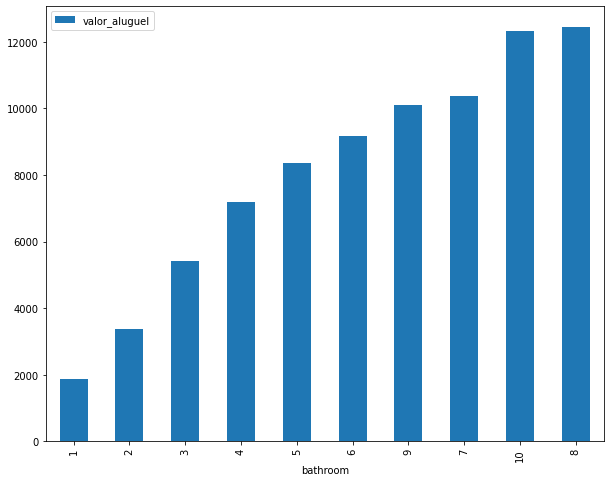

In [20]:
df_lite.groupby('bathroom').agg({'valor_aluguel': 'mean'}).round(2).sort_values(by='valor_aluguel', ascending=True).plot(kind='bar', figsize=(10, 8));

In [21]:
# como vimos com .describe(), as casas com aluguel acima de 5000 representam 25% dos aluguéis mais altos

filt = df_lite['valor_aluguel'] >= 5000
df_lite[filt]['bathroom'].mean()

3.6842105263157894

In [22]:
#  3
df_lite.groupby('animal').agg({'valor_aluguel':['mean', 'median', 'count']})

valor_aluguel              
                   mean  median count
animal                               
acept       4019.685786  2791.5  8316
not acept   3464.212121  2385.0  2376

In [23]:
df_lite[filt]['animal'].value_counts()

acept        2223
not acept     494
Name: animal, dtype: int64

In [24]:
#  4
df_lite.groupby('furniture').agg({'valor_aluguel': ['mean', 'median', 'count']})

valor_aluguel             
                       mean median count
furniture                               
furnished        4882.28703   3500  2606
not furnished    3578.46092   2400  8086

In [25]:
df_lite[filt]['furniture'].value_counts()

not furnished    1786
furnished         931
Name: furniture, dtype: int64

**Coeficiente de Correlação**

Acabamos de fazer análises para tentar descobrir quais variáveis influenciam o preço dos alugueis. Mas poderíamos ter feito testes de correlação, coisa que nos tiraria do senso comum também, e de forma estatística.

In [26]:
filt2 = df_lite.dtypes == 'uint16'

**Pearson**

In [27]:
pearson = df_lite.loc[:, filt2].corr('pearson')
pearson

,area,rooms,bathroom,parking spaces,floor,hoa (R$),valor_aluguel,property tax (R$),fire insurance (R$),total (R$)
area,1.000000,0.193796,0.226766,0.193983,-0.012724,0.079709,0.180742,0.148836,0.188078,0.186350
rooms,0.193796,1.000000,0.733763,0.617510,-0.078687,0.271447,0.541758,0.312799,0.565148,0.542230
bathroom,0.226766,0.733763,1.000000,0.697379,0.004894,0.392169,0.668504,0.405043,0.676399,0.687504
parking spaces,0.193983,0.617510,0.697379,1.000000,-0.020767,0.276284,0.578361,0.371419,0.597348,0.582253
floor,-0.012724,-0.078687,0.004894,-0.020767,1.000000,0.285981,0.073596,0.041808,0.013652,0.138417
hoa (R$),0.079709,0.271447,0.392169,0.276284,0.285981,1.000000,0.422263,0.336446,0.343742,0.646425
valor_aluguel,0.180742,0.541758,0.668504,0.578361,0.073596,0.422263,1.000000,0.407003,0.987343,0.947748
property tax (R$),0.148836,0.312799,0.405043,0.371419,0.041808,0.336446,0.407003,1.000000,0.399910,0.584815
fire insurance (R$),0.188078,0.565148,0.676399,0.597348,0.013652,0.343742,0.987343,0.399910,1.000000,0.916395
total (R$),0.186350,0.542230,0.687504,0.582253,0.138417,0.646425,0.947748,0.584815,0.916395,1.000000


**Spearman**

In [28]:
spearman = df_lite.loc[:, filt2].corr('spearman')
spearman

,area,rooms,bathroom,parking spaces,floor,hoa (R$),valor_aluguel,property tax (R$),fire insurance (R$),total (R$)
area,1.000000,0.848880,0.827743,0.701161,-0.146754,0.226005,0.728095,0.682270,0.745816,0.742698
rooms,0.848880,1.000000,0.769822,0.646679,-0.117345,0.206277,0.600969,0.595516,0.613788,0.622258
bathroom,0.827743,0.769822,1.000000,0.702826,-0.037922,0.293814,0.715890,0.654556,0.721150,0.740213
parking spaces,0.701161,0.646679,0.702826,1.000000,-0.030652,0.229236,0.620175,0.582921,0.625150,0.641492
floor,-0.146754,-0.117345,-0.037922,-0.030652,1.000000,0.618267,0.056828,0.048770,-0.004572,0.154157
hoa (R$),0.226005,0.206277,0.293814,0.229236,0.618267,1.000000,0.355827,0.392607,0.293266,0.519565
valor_aluguel,0.728095,0.600969,0.715890,0.620175,0.056828,0.355827,1.000000,0.659230,0.988045,0.968393
property tax (R$),0.682270,0.595516,0.654556,0.582921,0.048770,0.392607,0.659230,1.000000,0.656049,0.731728
fire insurance (R$),0.745816,0.613788,0.721150,0.625150,-0.004572,0.293266,0.988045,0.656049,1.000000,0.945977
total (R$),0.742698,0.622258,0.740213,0.641492,0.154157,0.519565,0.968393,0.731728,0.945977,1.000000


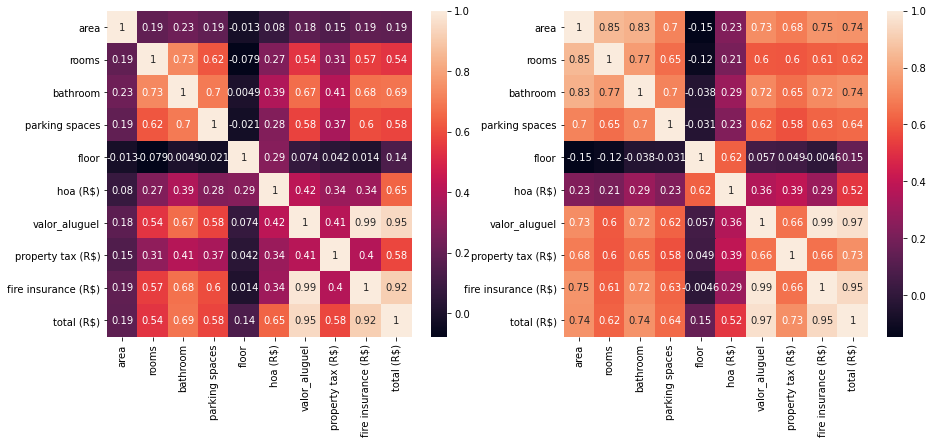

In [29]:
figure, (g1, g2) = plt.subplots(1, 2, figsize=(15, 6))
sns.heatmap(pearson, annot=True, ax=g1);
sns.heatmap(spearman, annot=True, ax=g2);

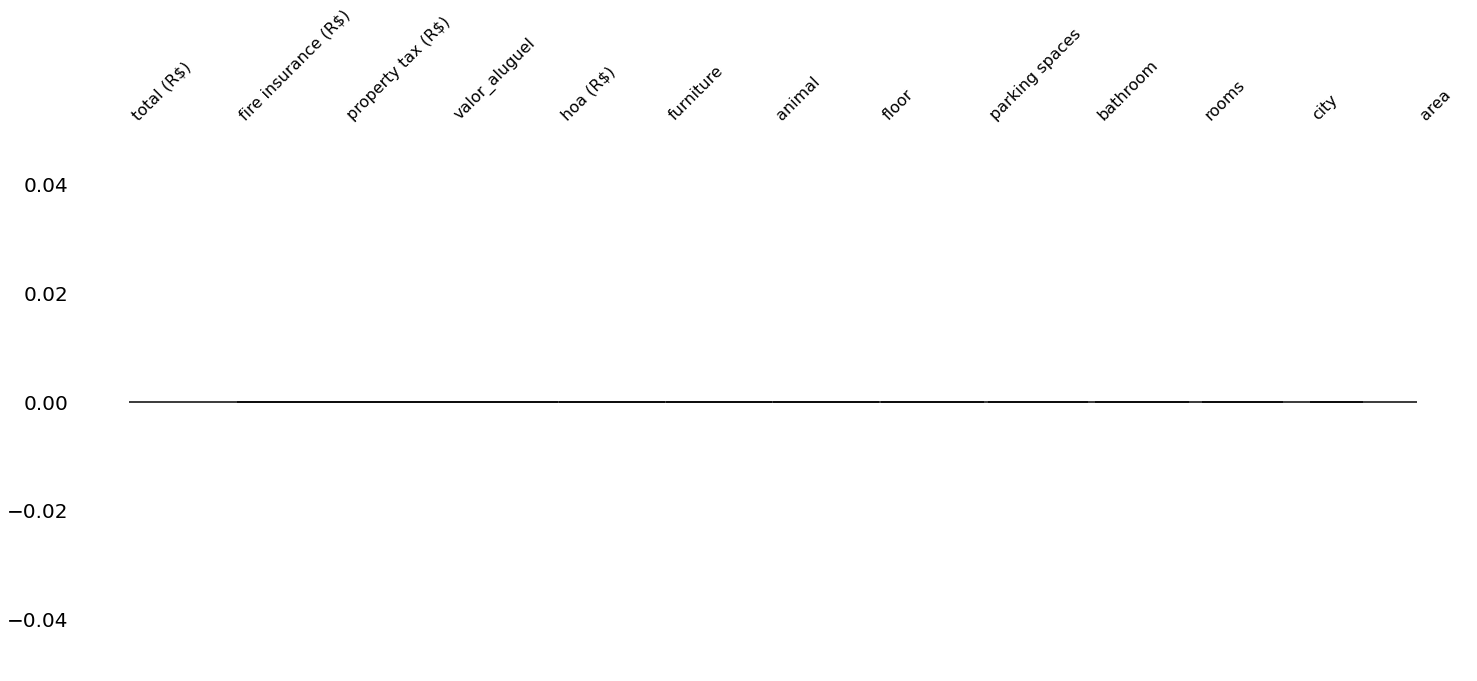

In [47]:
msno.dendrogram(df_lite);

**EDA (Exploratory Data Analisys)**

*EDA* pode ser vista como um **ciclo** de:

1. Geração de perguntas sobre os dados
2. Procura pelas respostas **Gráficamente, Modelado e Transformando os dados**
3. Refatoração das perguntas. Mas agora com o que se obteve no passo *2*

*EDA* não é uma receita de bolo, é um modo de pensar. Nos primeiros passos, a idéia é sentir-se livre pra investigar o que vem na mente. Pode ser que ajude ou te leve para um beco sem saída. A Análise Exploratória é uma parte muito importante, pois é necessário sempre investigar a **qualidade** dos seus dados.

O **objetivo** da *EDA* é obter entendimento dos dados, sendo a maneira mais simples disso é fazendo **perguntas** sobre o tema. Isso guiará sua investigação. E esse direcionamento que te auxiliará na escolha entre: gráfico, modelamento dos dados ou transformação deles. Isso porque, porguntando, vc acaba focando em pontos específicos da base de dados.

Dentro do mundo das perguntas que podem ser feitas, duas são de grande relevância:

1. Que tipo de **variação** ocorre **dentro** da minha variável?
2. Que tipo de **covariação** ocorre **entre** minhas variáveis?

Quando falamos de *EDA*, esses termos que ter a definição de alguns termos recorrentes:

- variável = uma propriedade que podemos medir
- valor = estado que uma variável pode assumir mediante medição. Pode variar de medição para pedição
- observação = conjunto de medidas feitas, em uma variável, sob as mesmas condições
- dado tabular = conjunto de valores associados à uma variável e a uma observação (só lembrar do tidy data)
- variação = tendência de uma variável mudar de medição em medição. Ocorre em categóricos ou contínuos

**Variáveis Categóricas**

Geralmente, variáveis desse tipo são contadas. Cada categoria tem a sua frequência. E para demonstrá-las, um gráfico de barras está de bom tamanho.

**Variáveis Contínuas**

Para estas, como podem expressar infintos valores, temos mais opções de visualização: pode ser histograma, *boxplot*, dispersão

**Valores Fora do Comum**

Numa variável contínua, é recorrente que apareçam dados "estranhos", que parecem não pertencer ao conjunto de tão extrapolados, eles são conhecidos como *outliers*. E dependendo da utilização dos dados, a presença deles pode prejudicar uma análise. Para saber se existem tais valores, basta fazer um *boxplot*. Ele indicará se seu *dataset* possui dados fora do padrão. Agora, para identificá-los, basta olhar nos limites do histograma. Como essa área representa os valores menos recorrentes, é nessa região que eles se encontram.

Depois de encontrá-los, que fazer? remover todo o registro desse *outlier* não é uma boa escolha. Agora, substituir seu valor por algum *conveniente* é uma boa abordagem.

**Receita de Bolo do EDA**

*Perguntas:*

1. Que perguntas está tentendo solucionar, ou provar que estão erradas?
2. Quais dtypes seu set possui e como tratá-los?
3. Quais valores faltantes do set e como lidar com eles?
4. Onde estão os outliers? e eu deveria me importar com eles?
5. Como eu posso adicionar, remover ou modificar meus dados para extrair o melhor deles?

*Respostas:*

1. Foque no que quer resolver, faça perguntas pertinentes sobre o objeto de análise

2. Para facilitar, separe as *features* de acordo com os seus dtypes, e vá analisando conjunto por conjunto. Nessa análise dos conjuntos, sempre reflita em como tal coluna desse conjunto pode contribuir para o seu problema. Se é uma coluna numérica, entenda elas. Se forem *features* do conjunto categórico, transforme-os em números que expressem tais categorias, e o nome disso é **Feature Engeneering**.

3. Essa questão merece um tópico particular

**Valores Faltantes**

**Não existe boa maneira** para lidar com os dados faltantes. Cada caso é um caso. E para tal, vamos entender quais razões para os dados *sumirem*

- Perdidos ao Acaso: o valor faltante está relacionado com algum dos dados observados.
- Perdidos Completamente ao acaso: o valor faltante não tem nada a ver com os valores de outras variáveis.
- Perdidos de propósito: mulheres não revelarem a idade, pessoas com salário alto não revelam quantias.

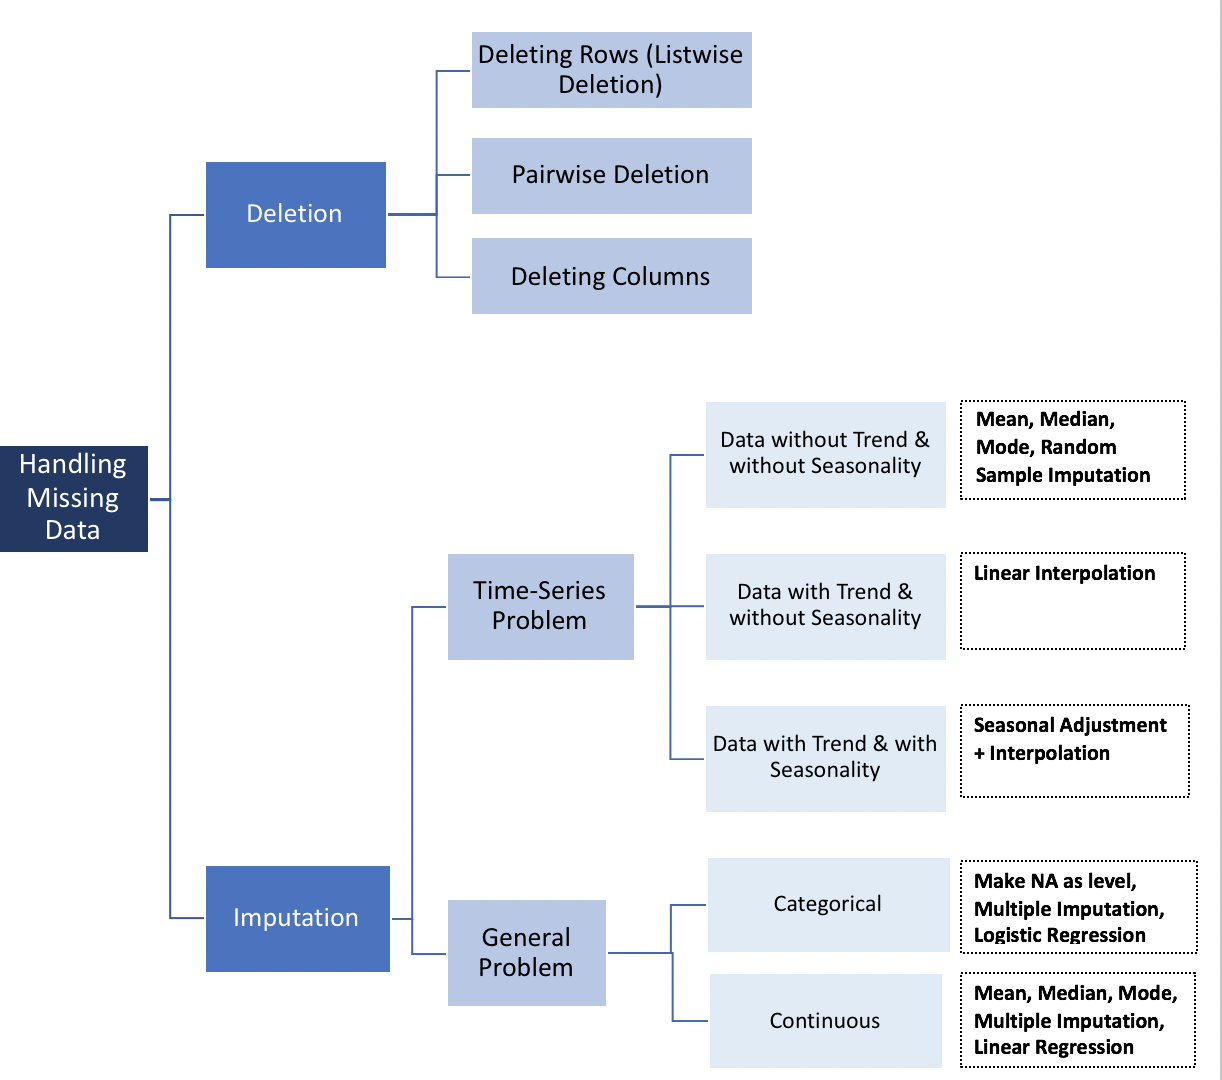

Sempre escolha **MANTER** os dados, preencher com algum valor conveniente, do que deletar, seja a linha toda ou coluna.

Para ler o restante, entre no [link](https://towardsdatascience.com/how-to-handle-missing-data-8646b18db0d4)

4. Uma regrinha: valores acima de 3std são potenciais *outliers*. E para vê-los, **boxplot** e **histograma**. Depois de achá-los, retirá-los pode tornar o modelo ordinário, mantê-los pode tornar seu modelo preciso demais (overfitting). Então, ir dosando é a mehor maneira de saber o que fazer.

**Visualização dos Dados**

O sentido aqui é: transcrever o que o pessoal de negócio está pensando sobre o problema para visualizações que façam sentido, que senja **ENTENDíVEL**

**Contagem de valores**
```python
sns.countplot(x='Título', y='Título', data=variavel, orient='v'ou'h', hue='Título', ax=variavel)
```
- x ou y = colunas do *data* que quremos que sejam as variáveis no eixo *x* ou *y*. **MAS SÓ PODE PASSAR UMA!!**

**Gráfico de barras**
```python
sns.baplot(data=variavel, x='Título', y='Título', orient='v'ou'h', ax=variavel)
```
**Gráfico de disperção**
```python
sns.scatterplot(data=variavel, x='Título', y='Título', hue='Título', ax=variavel)
```
- data = dict ou dataframe
- x ou y = colunas do *data* que quremos que sejam as variáveis no eixo *x* ou *y*.
- orient = 'v' de *vertical* e 'h' de *horizontal*
- ax = pra fazer subplots
- hue = cria legendas

**Histograma**
```python
sns.distplot(a=variável, bins=int ou não preenche, hist=bool, kde=bool, norm_hist=bool, ax=variavel)
```
- a = lista ou Series
- bins = quantidade de intervalo de classes. Se não preencher, a própria função reconhece a melhor quantidade
- hist = mostra o histograma
- kde = mostra a curva gaussiana
- norm_hist = mostra densidade no eixo y ou contagem. **Só funciona se o kde=False**
- ax = para fazer subplots


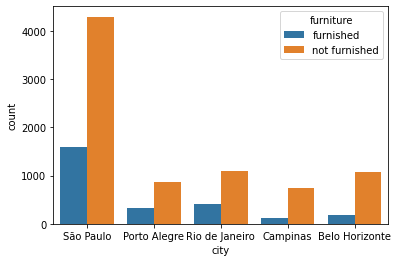

In [30]:
sns.countplot(data=df_lite, x='city', hue='furniture');

In [31]:
df_lite['city'].value_counts()

São Paulo         5887
Rio de Janeiro    1501
Belo Horizonte    1258
Porto Alegre      1193
Campinas           853
Name: city, dtype: int64

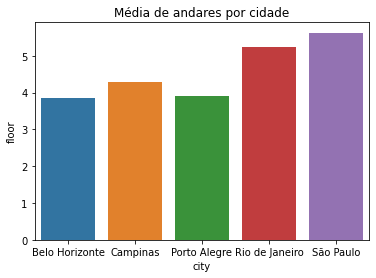

In [32]:
sns.barplot(data=df_lite.groupby('city')['floor'].mean().reset_index(), x='city', y='floor');
plt.title('Média de andares por cidade');

In [33]:
df_lite.groupby('city')['floor'].mean().reset_index()

,city,floor
0,Belo Horizonte,3.860890
1,Campinas,4.280188
2,Porto Alegre,3.918692
3,Rio de Janeiro,5.250500
4,São Paulo,5.626465


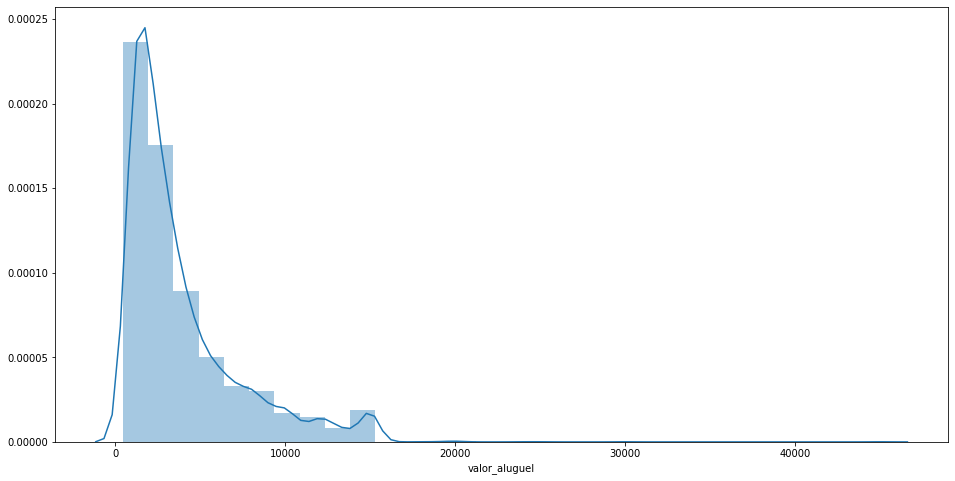

In [34]:
plt.figure(figsize=(16, 8))
sns.distplot(a=df_lite['valor_aluguel'], bins=30, hist=True, kde=True, norm_hist=True);

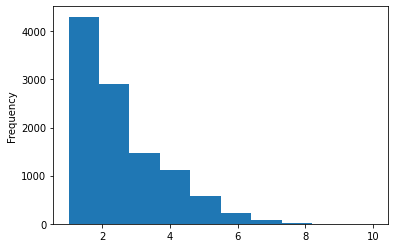

In [42]:
df_lite['bathroom'].plot.hist();

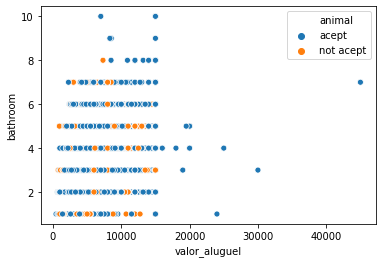

In [35]:
sns.scatterplot(data=df_lite, x='valor_aluguel', y='bathroom', hue='animal');

In [56]:
df_lite['valor_aluguel'][df_lite['valor_aluguel'] < 1000].count()

838